# Tasks

* Download stocks prizes for a couple of years
* Prepare the data
* Train 3 regression models ( see https://scikit-learn.org/stable/supervised_learning.html#supervised-learning )
** Ridge regression
** Lasso
** LARS lasso

In [1]:
# install pandas
import sys
!{sys.executable} -m pip install pandas pandas-datareader matplotlib sklearn

# fix the datareader version
!{sys.executable} -m pip install pandas-datareader --upgrade



Requirement already up-to-date: pandas-datareader in /anaconda3/envs/siraj_mmwml/lib/python3.7/site-packages (0.7.4)


In [2]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 1, 11)

# Read stockprizes for berkshire hathaway from yahoo finance
df = web.DataReader("BRK-A", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-07,297170,292970,294500,295400,600,295400
2019-01-08,299060,292179,299060,294300,300,294300
2019-01-09,296250,292600,295990,294560,300,294560
2019-01-10,296725,292815,293600,295160,300,295160
2019-01-11,294300,292000,293750,293980,500,293980


In [3]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg = mavg.dropna()
mavg.tail()

Date
2019-01-07    314659.34
2019-01-08    314494.19
2019-01-09    314349.29
2019-01-10    314170.89
2019-01-11    313976.04
Name: Adj Close, dtype: float64

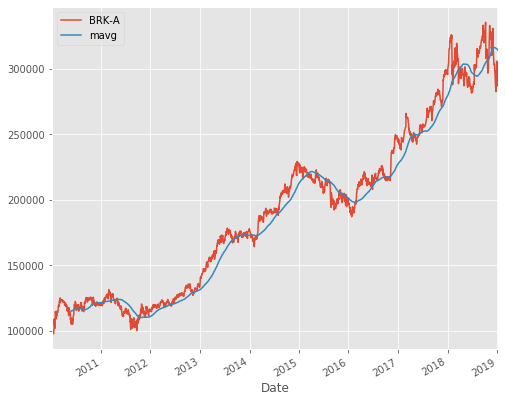

In [4]:
# plot
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='BRK-A')
mavg.plot(label='mavg')
plt.legend()

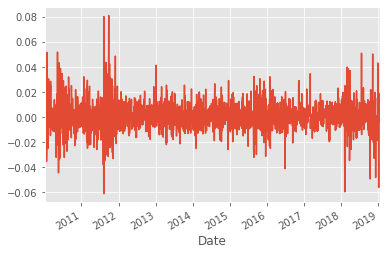

In [5]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [6]:
import numpy as np

window_size = 100

num_samples = len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)

data = df['Adj Close'].values[indices] 
X = data[:,:-1]
y = data[:,-1]

split_fraction = 0.9
ind_split = int(split_fraction * num_samples)
X_train = X[:ind_split]
y_train = y[:ind_split]
X_test = X[ind_split:]
y_test = y[ind_split:]

# Ridge regression

In [7]:
from sklearn.linear_model import Ridge

# Fit model on training data
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Infer on test data (20%)
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_ridge = ridge_model.predict(X_test)

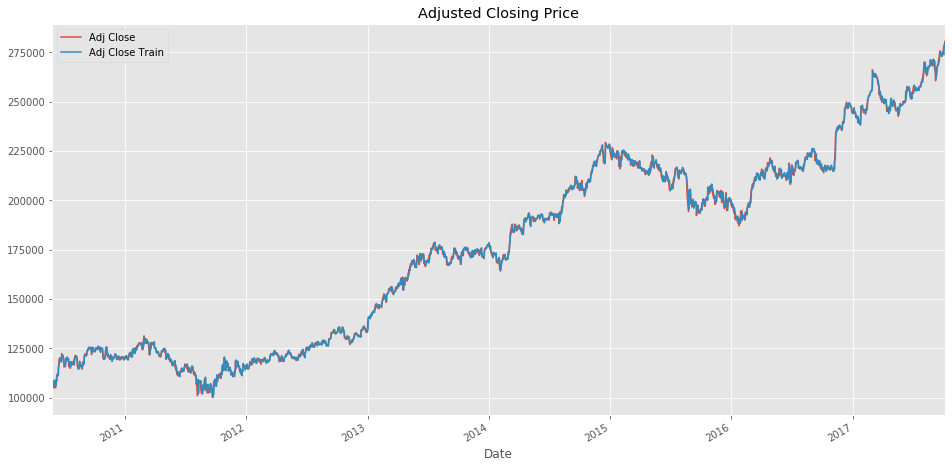

In [8]:
# plot results
df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[window_size:ind_split]
df_ridge['Adj Close Train'] = y_pred_train_ridge[:-window_size]
df_ridge.plot(label='BRK-A', figsize=(16,8), title='Adjusted Closing Price', grid=True)

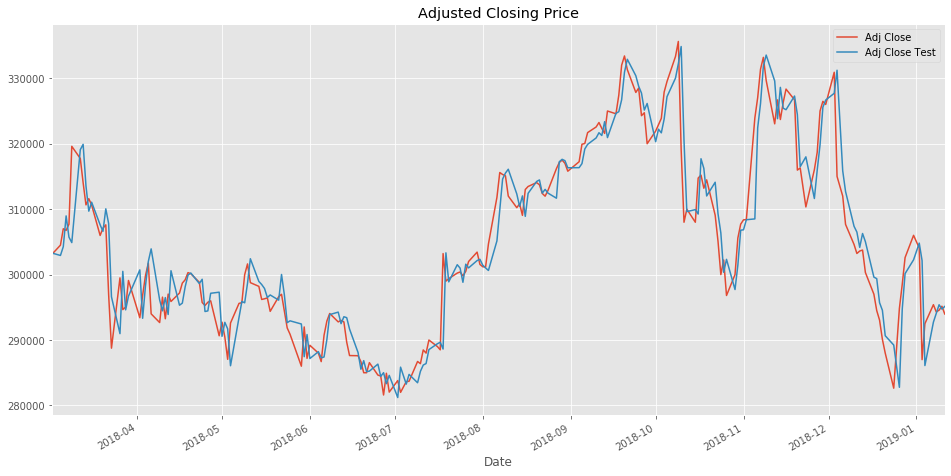

In [9]:
# test the trained model
df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[ind_split+window_size:]
df_ridge['Adj Close Test'] = y_pred_ridge
df_ridge.plot(label='BRK-A', figsize=(16,8), title='Adjusted Closing Price', grid=True)

# Lasso regression

In [10]:
from sklearn.linear_model import LassoLars

# Fit model on training data
lasso_model = LassoLars()
lasso_model.fit(X_train, y_train)

# Infer on test data (20%)
y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_lasso = lasso_model.predict(X_test)

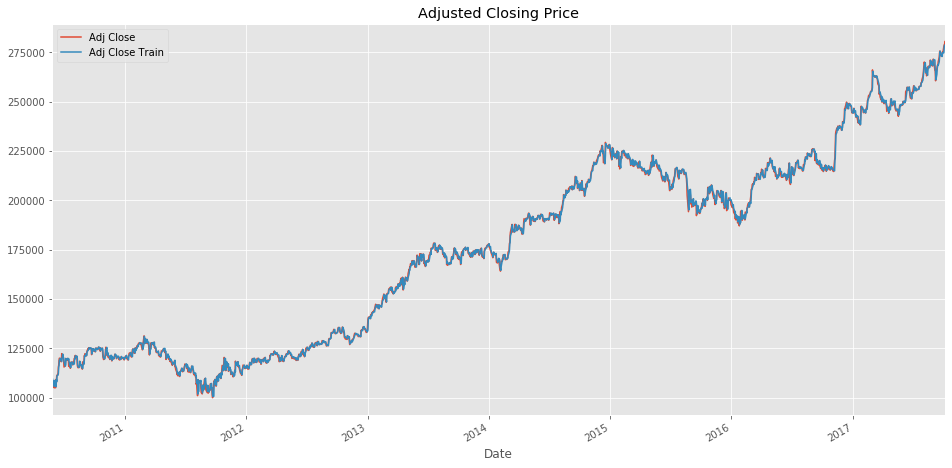

In [11]:
# plot results
df_lasso = df.copy()
df_lasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lasso = df_lasso.iloc[window_size:ind_split]
df_lasso['Adj Close Train'] = y_pred_train_lasso[:-window_size]
df_lasso.plot(label='BRK-A', figsize=(16,8), title='Adjusted Closing Price', grid=True)

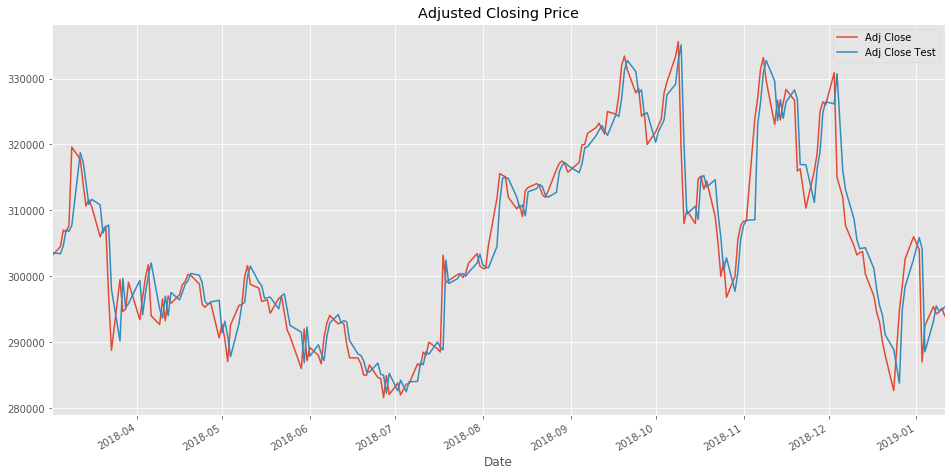

In [12]:
# test the trained model
df_lasso = df.copy()
df_lasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lasso = df_lasso.iloc[ind_split+window_size:]
df_lasso['Adj Close Test'] = y_pred_lasso
df_lasso.plot(label='BRK-A', figsize=(16,8), title='Adjusted Closing Price', grid=True)

# Linear regression

In [13]:
from sklearn.linear_model import LinearRegression

# Fit model on training data
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Infer on test data (20%)
y_pred_train_linear = linear_model.predict(X_train)
y_pred_linear = linear_model.predict(X_test)

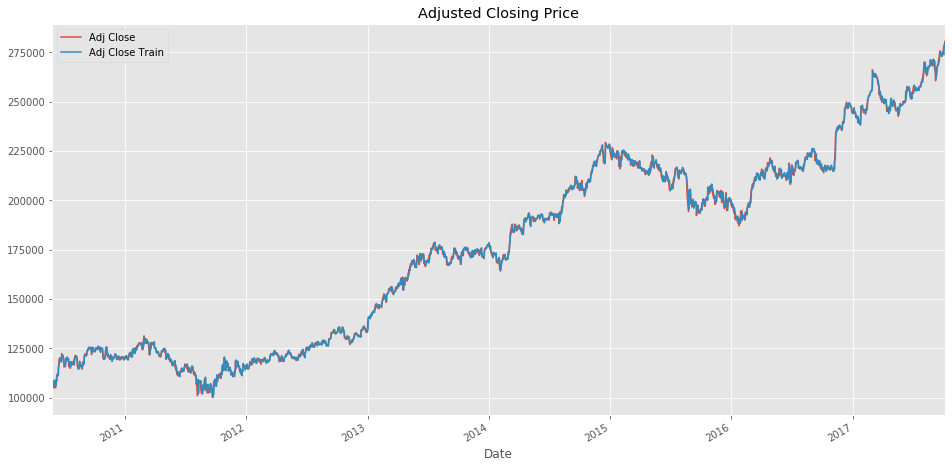

In [14]:
# plot results
df_linear = df.copy()
df_linear.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_linear = df_linear.iloc[window_size:ind_split]
df_linear['Adj Close Train'] = y_pred_train_linear[:-window_size]
df_linear.plot(label='BRK-A', figsize=(16,8), title='Adjusted Closing Price', grid=True)

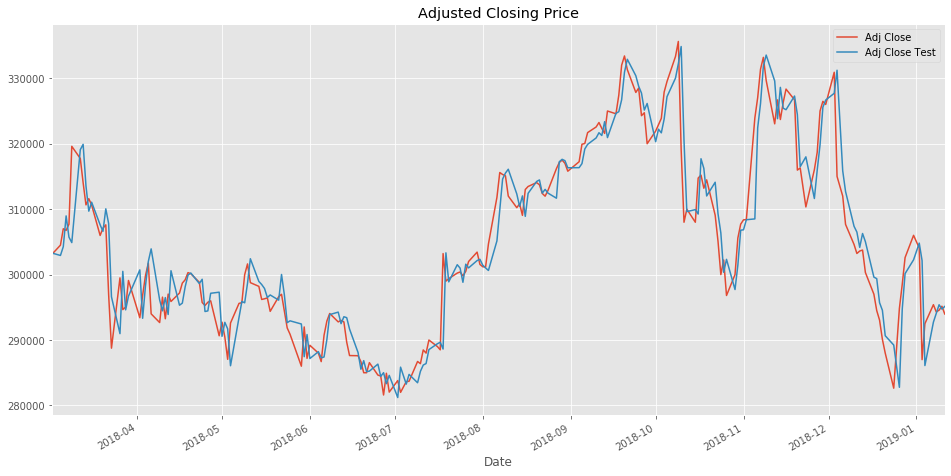

In [15]:
# test the trained model
df_linear = df.copy()
df_linear.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_linear = df_linear.iloc[ind_split+window_size:]
df_linear['Adj Close Test'] = y_pred_linear
df_linear.plot(label='BRK-A', figsize=(16,8), title='Adjusted Closing Price', grid=True)

# Example predictions

In [16]:
# predict 30 days into the future
number_of_days_to_predict = 30 

data_span = df['Adj Close'].values[-window_size:][None]


input_values = {"ridge": data_span, "lasso": data_span, "linear": data_span}
values = {"ridge": [], "lasso": [], "linear": []}
for day_number in range(number_of_days_to_predict):
    
    # predict
    values["ridge"].append(ridge_model.predict(input_values["ridge"])[0])
    values["lasso"].append(lasso_model.predict(input_values["lasso"])[0])
    values["linear"].append(linear_model.predict(input_values["linear"])[0])

    # Dump the oldest price and put the newest price at the end
    for v in input_values:
        current_value = input_values[v]
        current_value = np.insert(current_value, -1, values[v][-1], axis=1)
        current_value = np.delete(current_value, 0, axis=1)
        input_values[v] = current_value.copy()

# Convert all to NumPy arrays
for v in input_values:
    values[v] = np.array(values[v])

print(values)


{'ridge': array([293580.3223057 , 293258.11036729, 294265.91645897, 293000.00670196,
       293976.64336062, 293631.90607598, 295975.79111642, 297415.78818034,
       295087.98608591, 295416.15467529, 292827.68746533, 296439.32859822,
       293729.57881739, 292808.17529864, 293646.99678047, 295452.23887844,
       293487.72460984, 295391.84558134, 296522.43103824, 294627.60530751,
       294067.41709775, 295994.43705813, 293548.47900757, 296494.30315011,
       295356.50033064, 295727.30785362, 293879.49531268, 293653.68014224,
       292672.05881935, 292730.08438788]), 'lasso': array([294375.81632331, 294418.90641401, 294389.73207195, 294377.61745561,
       294605.03923196, 294650.53750024, 294722.39142221, 294756.75871396,
       294711.17001532, 294583.60910163, 294639.91880714, 294610.95291048,
       294640.15190664, 294665.06803717, 294647.1794382 , 294516.527246  ,
       294516.72031165, 294441.71250231, 294508.69485849, 294540.729879  ,
       294617.95641393, 294638.6888365

2019-01-11 00:00:00


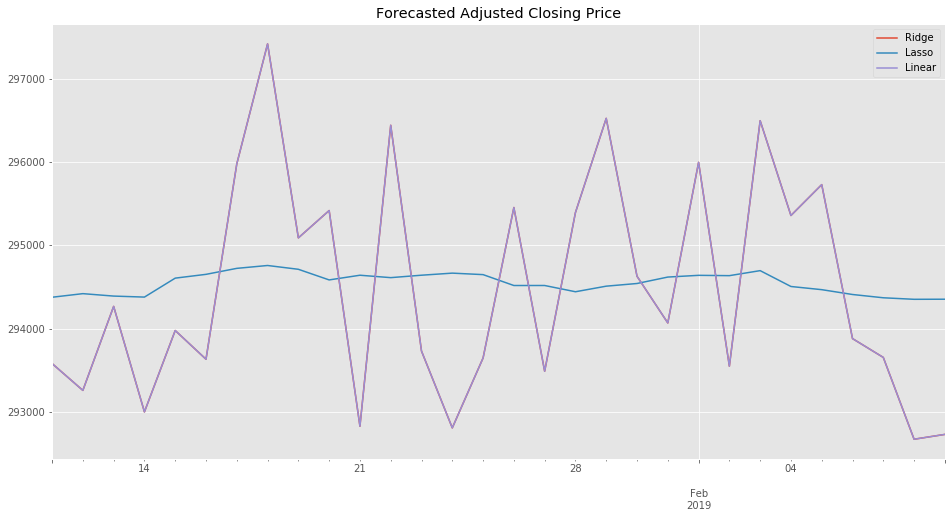

In [17]:
# plot results
from datetime import timedelta, datetime

print(df.index[-1])
last_date = df.index[-1]
df_forecast = pd.DataFrame()
df_forecast["Ridge"] = values["ridge"]
df_forecast["Lasso"] = values["lasso"]
df_forecast["Linear"] = values["linear"]
df_forecast.index = pd.date_range(start=last_date, periods=number_of_days_to_predict)
df_forecast.plot(label='BRK-A', figsize=(16,8), title='Forecasted Adjusted Closing Price', grid=True)

Fascinating to see ridge and linear regression to almost predict the same values.